In [1]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
import matplotlib.pyplot as plt #畫圖用
import numpy as np
from PIL import Image
from keras.optimizers import Adagrad
from keras.models import load_model


%matplotlib inline

/Users/championlin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = load_model('/Users/championlin/Downloads/my_model.h5')

In [3]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [4]:
adagrad = Adagrad(lr=0.01, epsilon=1e-08)
model.compile(loss='categorical_crossentropy',
              optimizer=adagrad,
              metrics=['accuracy'])

In [5]:
(_,_), (X_test, y_test) = cifar10.load_data()

In [6]:
Y_test = np_utils.to_categorical(y_test, 10)

In [7]:
num_test = len(X_test)

In [8]:
num_test

10000

In [9]:
X_test = X_test.astype('float32')
X_test /= 255

Y_test = Y_test.astype('float32')
Y_test /= 255

In [10]:
X_test.shape

(10000, 32, 32, 3)

In [11]:
score = model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 21s 2ms/step


In [12]:
print('loss:',score[0])
print('accuracy:',score[1])

loss: 0.002590919805876911
accuracy: 0.7775


In [13]:
result = model.predict_classes(X_test)

In [14]:
LABELS = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
          'horse', 'ship', 'truck']

In [15]:
def show(test_number):
    plt.imshow(X_test[test_number])
    plt.show()
    LABELS = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog','horse', 'ship', 'truck']
    print("print:", LABELS[result[test_number]])

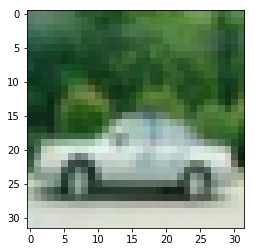

print: automobile


In [25]:
show(330)

In [18]:
def photo_transpose(input_photo):
    input_photo = Image.open(input_photo)
    im = input_photo.resize((32, 32),Image.BILINEAR)
    im = np.asarray(im)
    im = im.astype("float32")
    im /= (np.amax(im) - np.amin(im))
    rang = np.array(range(3))
    leave = np.delete(rang, im.shape.index(3))
    im_2 = im.transpose(np.append(im.shape.index(3),leave))
    im_2 = np.resize(im_2, (3, 32, 32))
    im1 = im_2.reshape([1,3,32,32])
    im1 = im1.transpose((0, 2, 3, 1))
    
    return im, im1

In [19]:
#im2 = photo_transpose("/Users/championlin/dog.jpg")
im3_1, im3_2 = photo_transpose("/Users/championlin/test_picture/montgomery-lcs-8-2016-05-06-at-22319-pm_26860991805_o.png")

In [20]:
#result2 = model.predict_classes(im2)
result3 = model.predict_classes(im3_2)

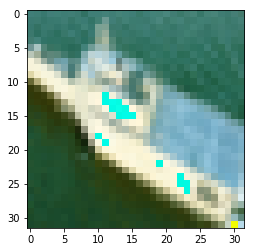

'ship'

In [21]:
plt.imshow(im3_1)
plt.show()
pp_num = result3[0]
LABELS[pp_num]